In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams["font.family"] = "Hiragino Maru Gothic Pro"
import warnings
warnings.filterwarnings("ignore")

In [17]:
import requests
import io

url = 'https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv'
res = requests.get(url).content
df = pd.read_csv(io.StringIO(res.decode('utf-8')), header=0, index_col=0, parse_dates=True)

In [18]:
df.head()

,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.tail()

,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-02,19267,1805,171,125,231,114,112,252,412,225,...,99,71,1145,252,210,233,168,199,373,770
2022-05-03,30433,1718,296,212,389,310,113,346,407,499,...,272,197,1856,294,412,567,391,357,704,1761
2022-05-04,26421,2090,246,221,326,173,137,319,498,207,...,103,150,1557,175,361,314,247,372,469,1201
2022-05-05,20713,1854,290,197,210,170,125,339,481,233,...,130,157,1372,244,229,255,230,225,420,1327
2022-05-06,21547,1668,153,181,230,181,115,324,340,262,...,135,140,1181,294,203,290,258,287,521,1398


In [20]:
# NaNの確認
sum(df.isnull().any())

0

In [21]:
len(df)

842

### 時系列プロット

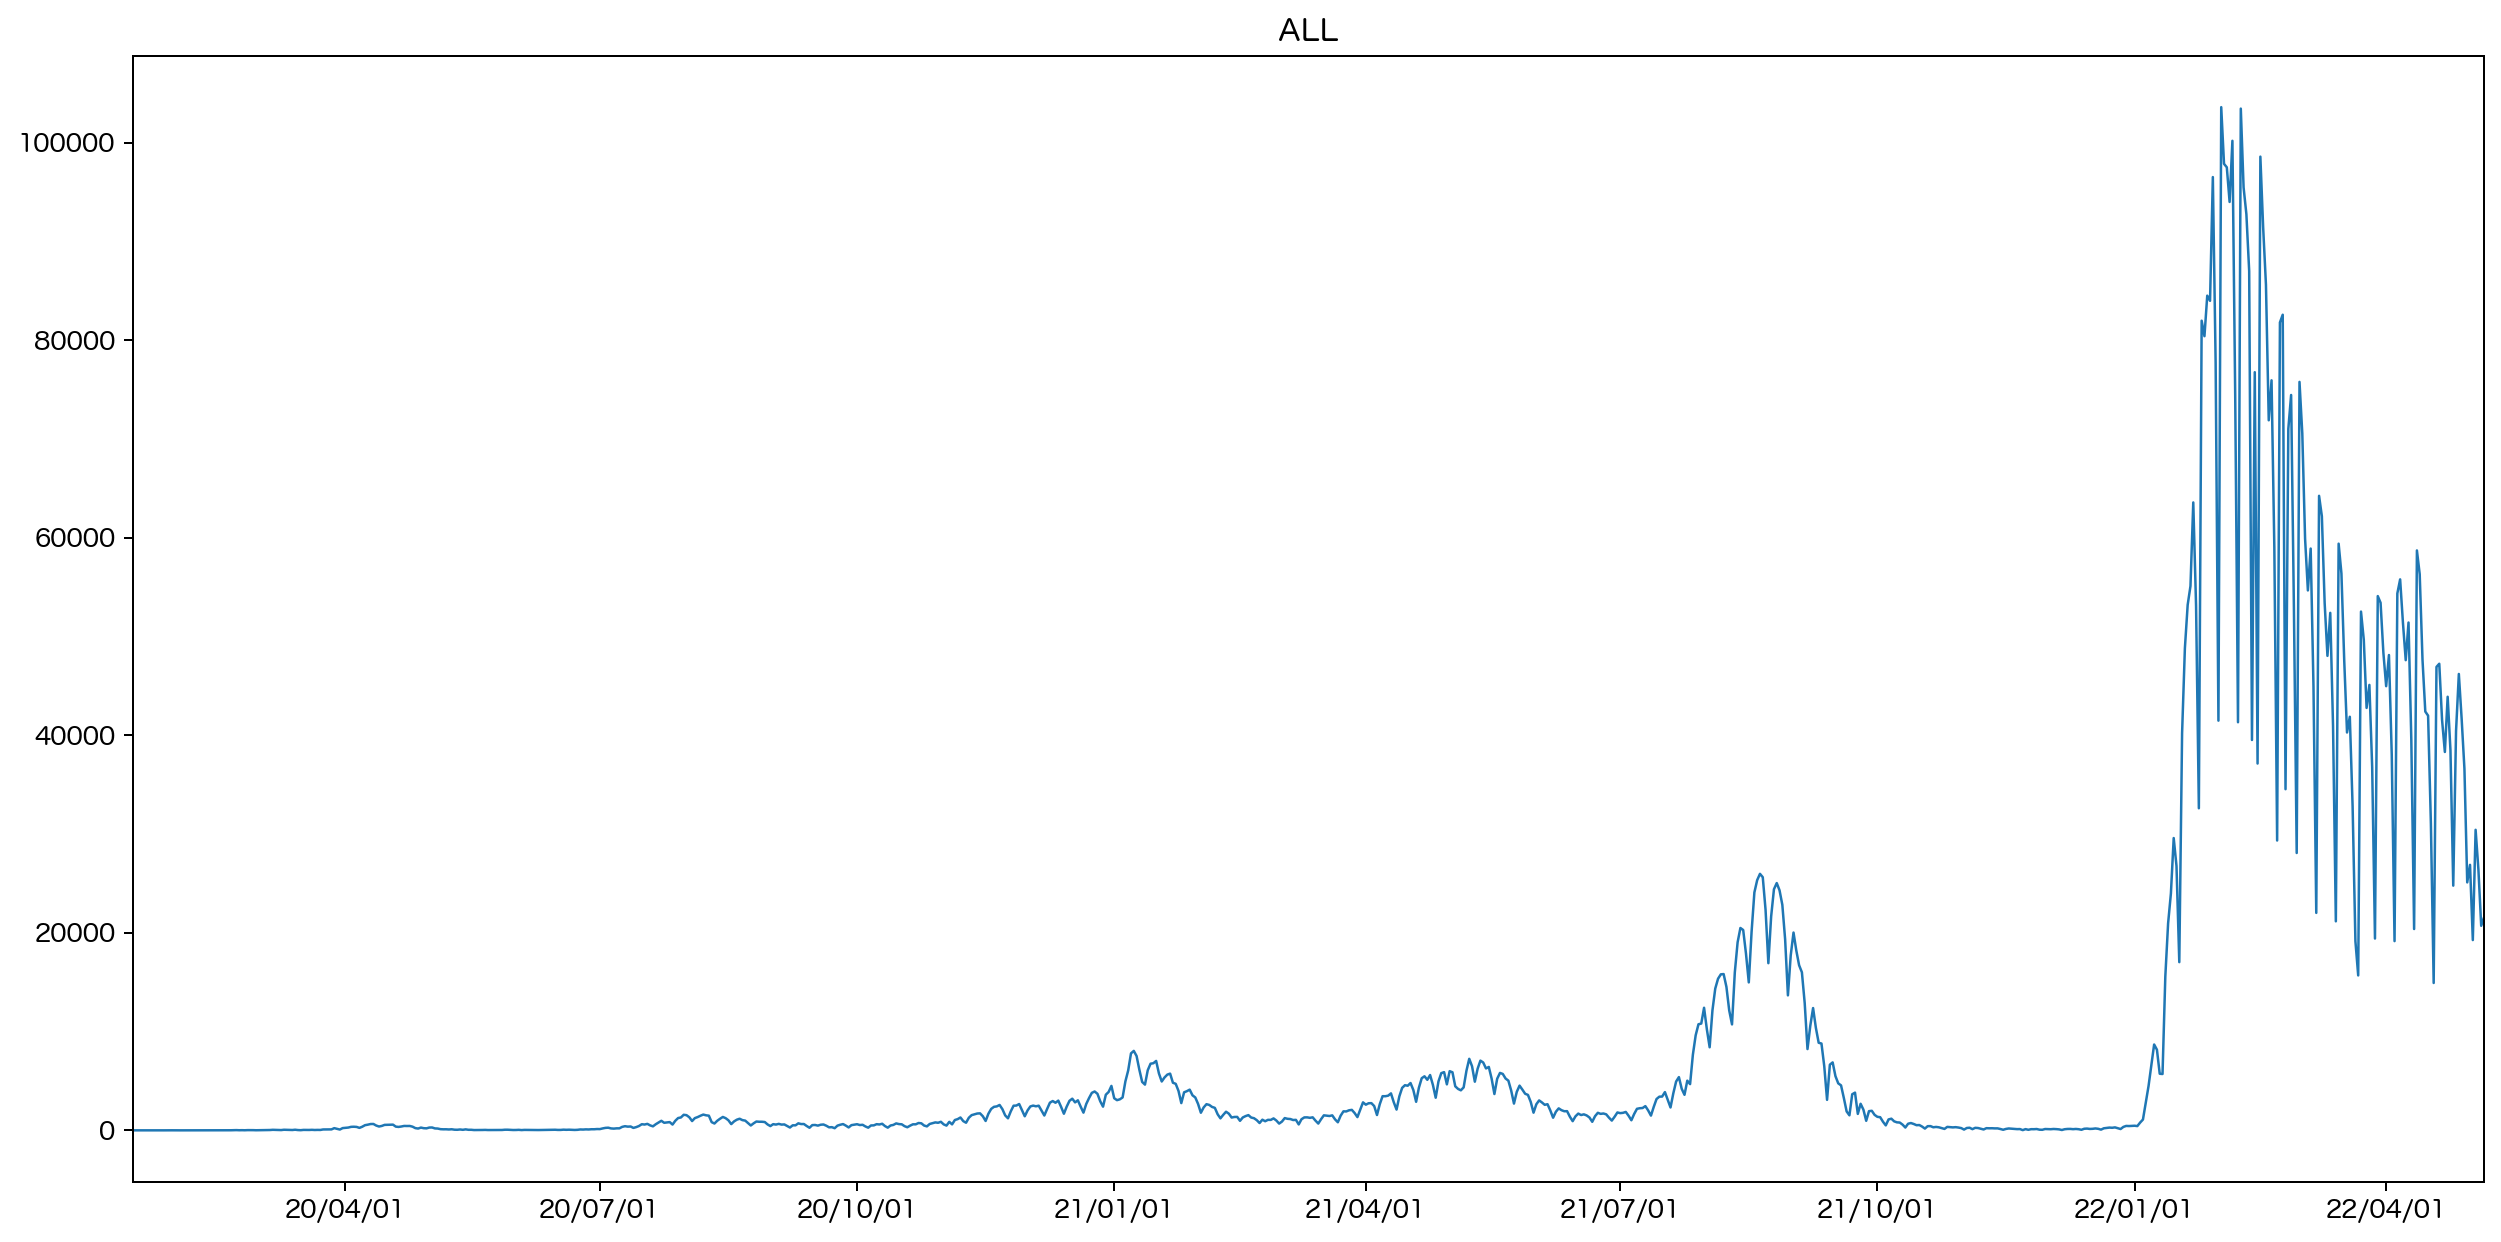

In [57]:
from matplotlib.dates import DateFormatter

target = 'ALL'

fig = plt.figure(figsize=(14, 7), dpi=180)
x = df.index
y = df[target].to_numpy()
title = target
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth=1.0)
ax.xaxis.set_major_formatter(DateFormatter("%y/%m/%d"))
ax.set_xlim(x[0], x[-1])
ax.set_title(title, fontsize=12)
fig.tight_layout()
plt.show()
plt.close()

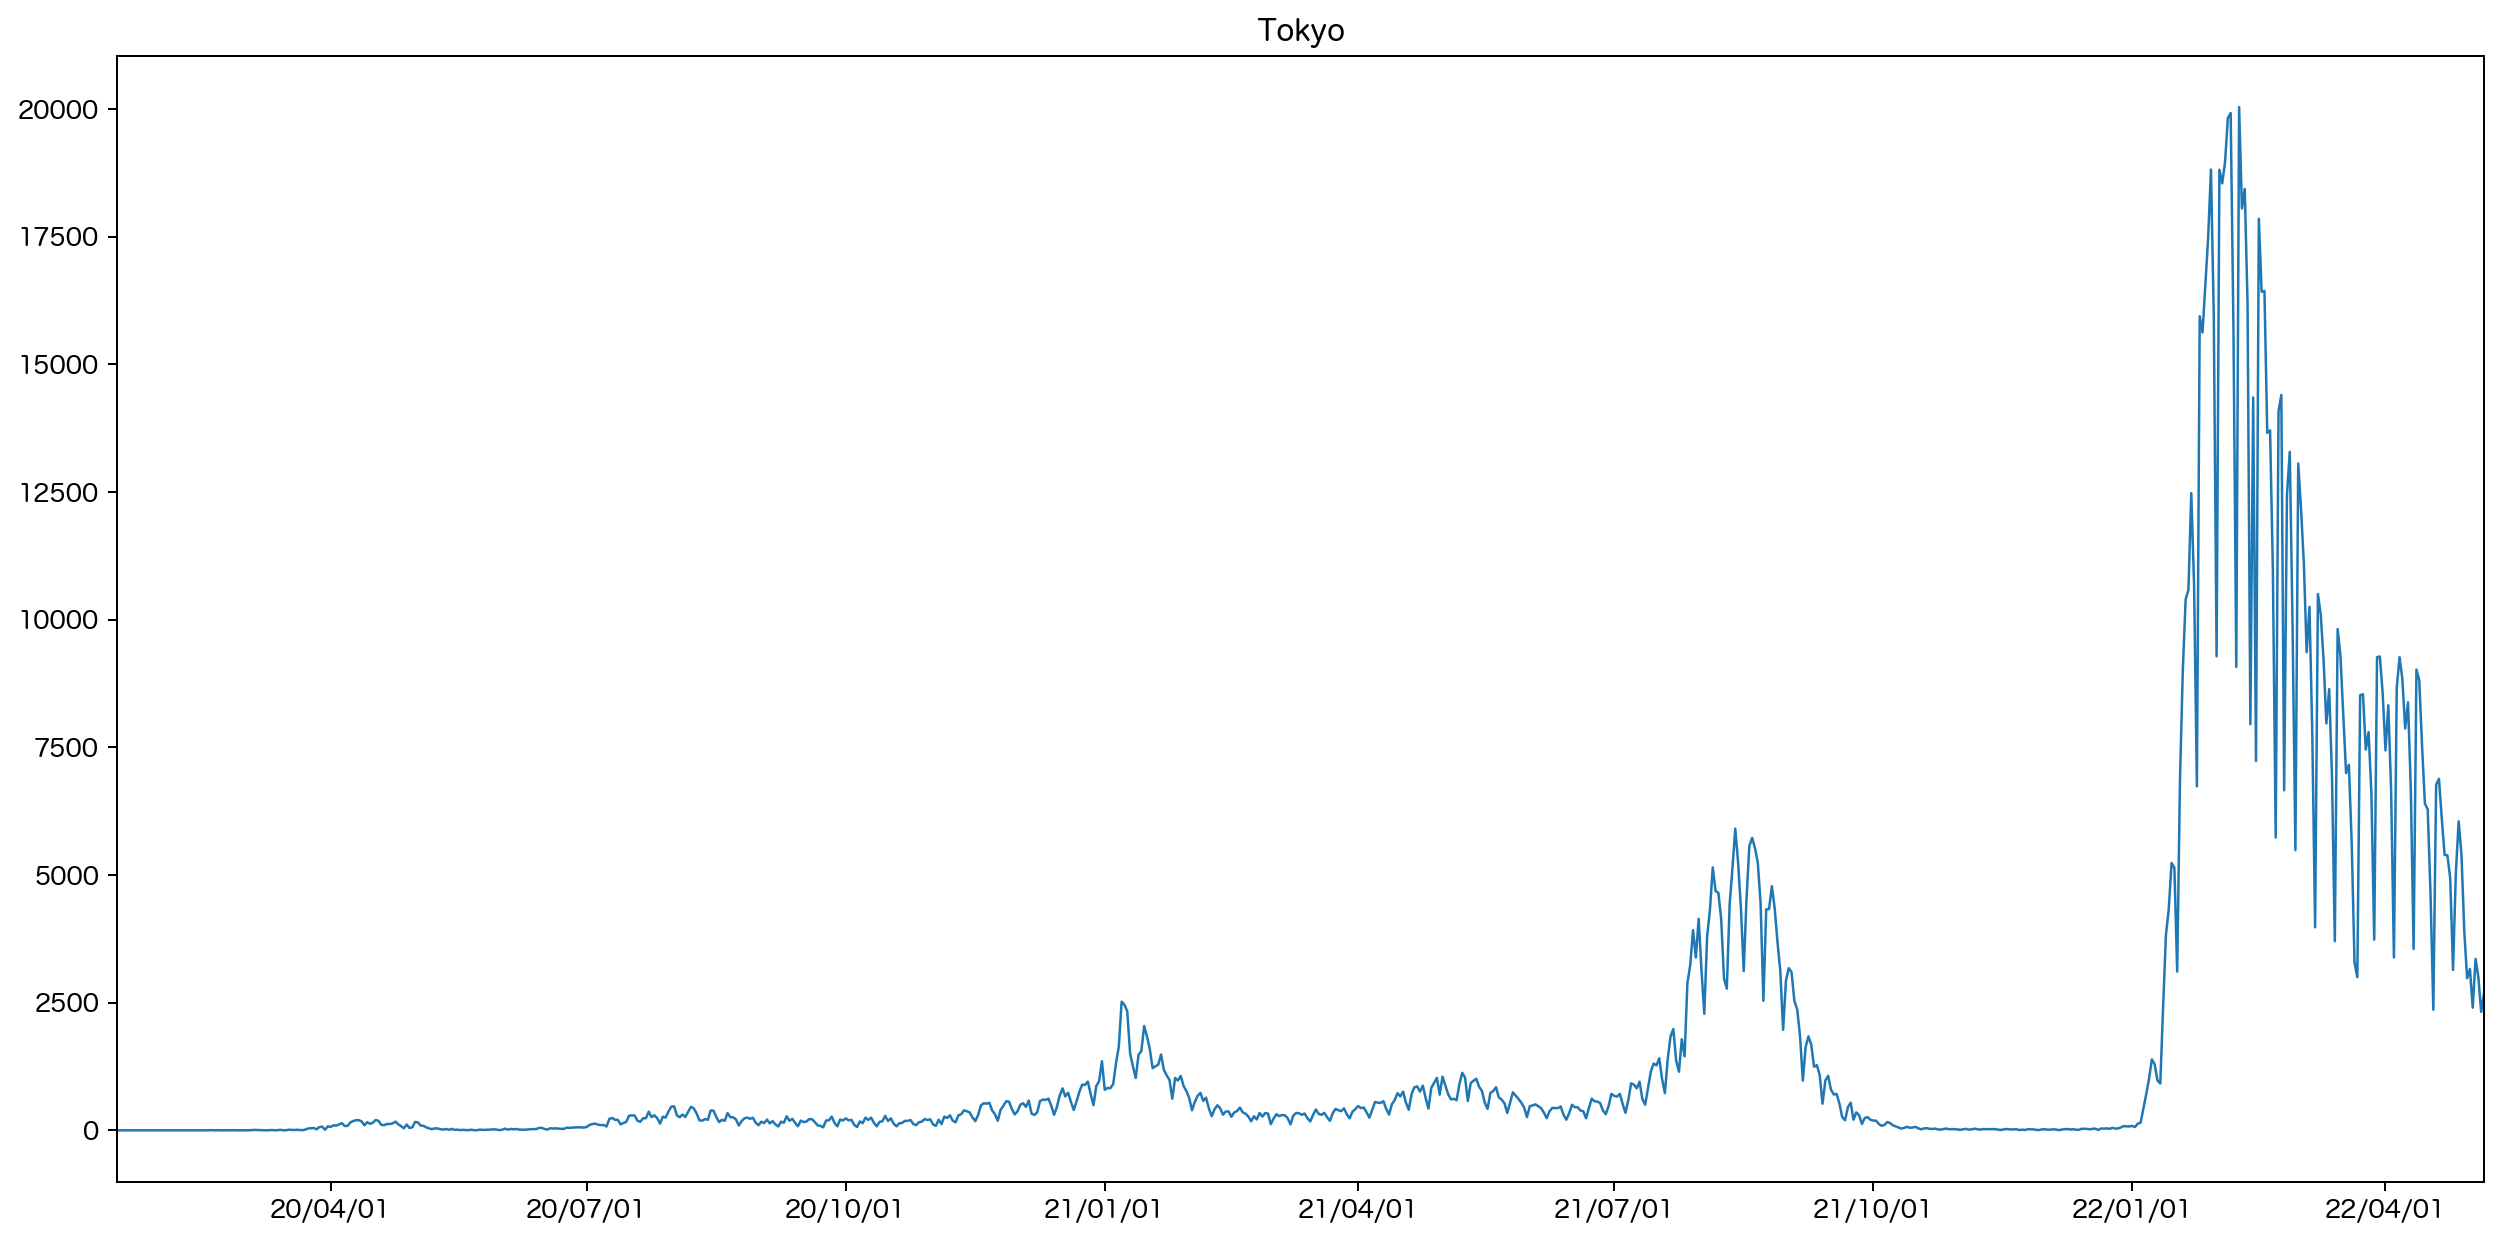

In [58]:
target = 'Tokyo'

fig = plt.figure(figsize=(14, 7), dpi=180)
x = df.index
y = df[target].to_numpy()
title = target
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth=1.0)
ax.xaxis.set_major_formatter(DateFormatter("%y/%m/%d"))
ax.set_xlim(x[0], x[-1])
ax.set_title(title, fontsize=12)
fig.tight_layout()
plt.show()
plt.close()

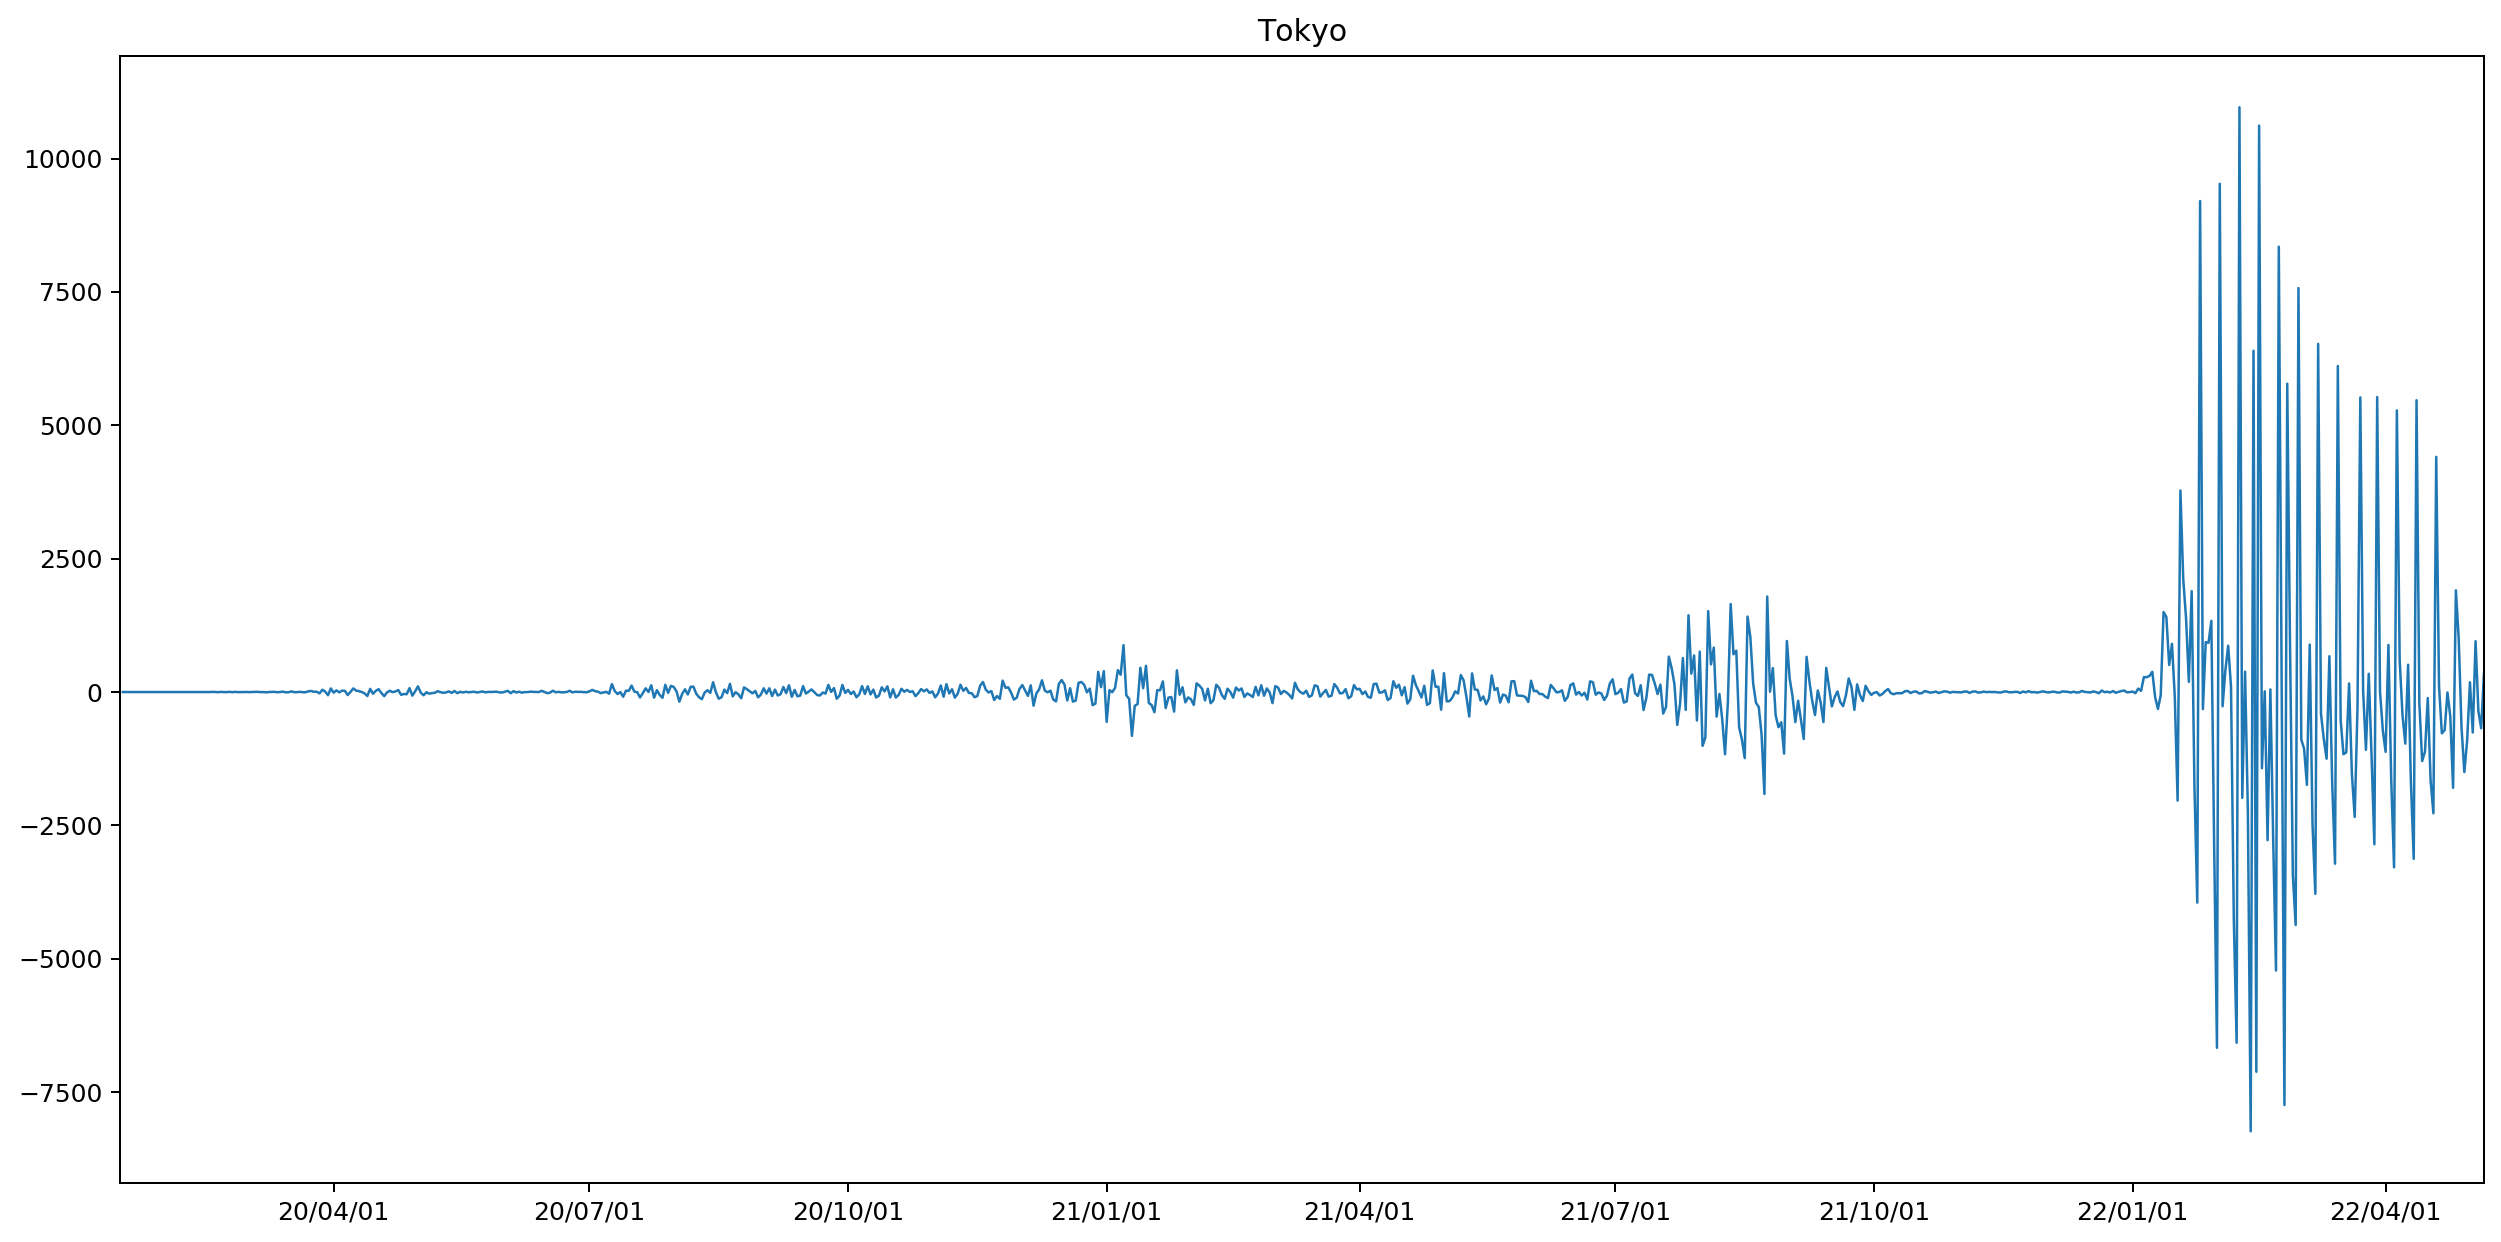

In [24]:
# 差分
fig = plt.figure(figsize=(14, 7), dpi=180)
x = df.index
y = df[target].diff().to_numpy()
title = target
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth=1.0)
ax.xaxis.set_major_formatter(DateFormatter("%y/%m/%d"))
ax.set_xlim(x[0], x[-1])
ax.set_title(title, fontsize=12)
fig.tight_layout()
plt.show()
plt.close()

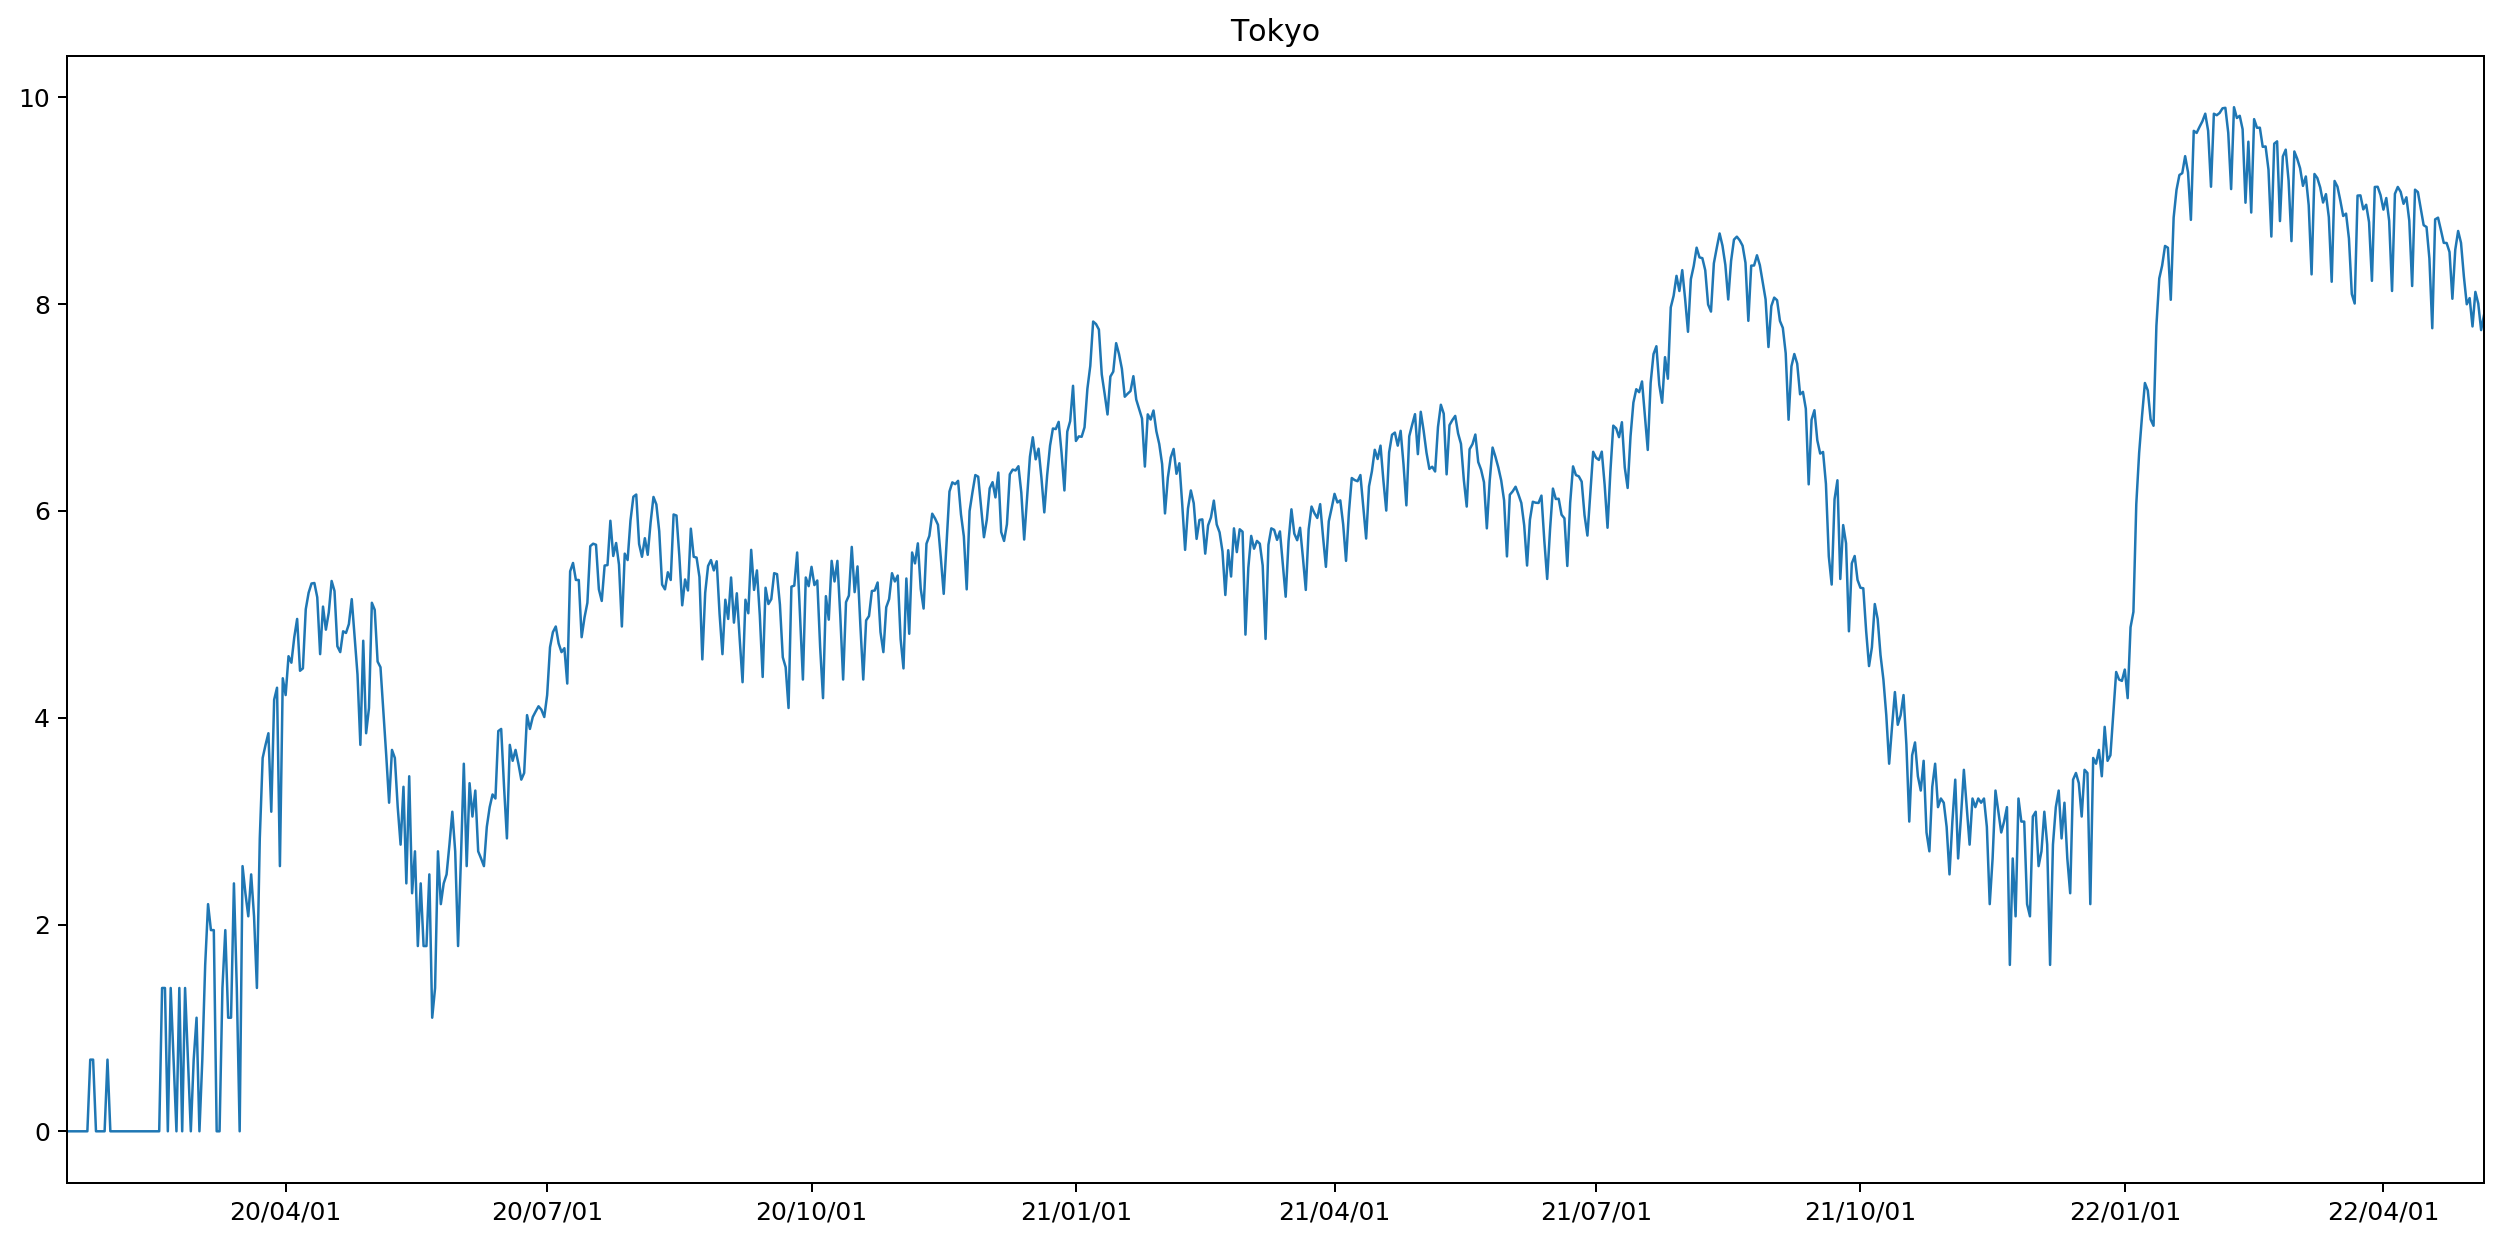

In [28]:
# 対数
fig = plt.figure(figsize=(14, 7), dpi=180)
x = df.index
y = np.log1p(df[target]).to_numpy()
title = target
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth=1.0)
ax.xaxis.set_major_formatter(DateFormatter("%y/%m/%d"))
ax.set_xlim(x[0], x[-1])
ax.set_title(title, fontsize=12)
fig.tight_layout()
plt.show()
plt.close()

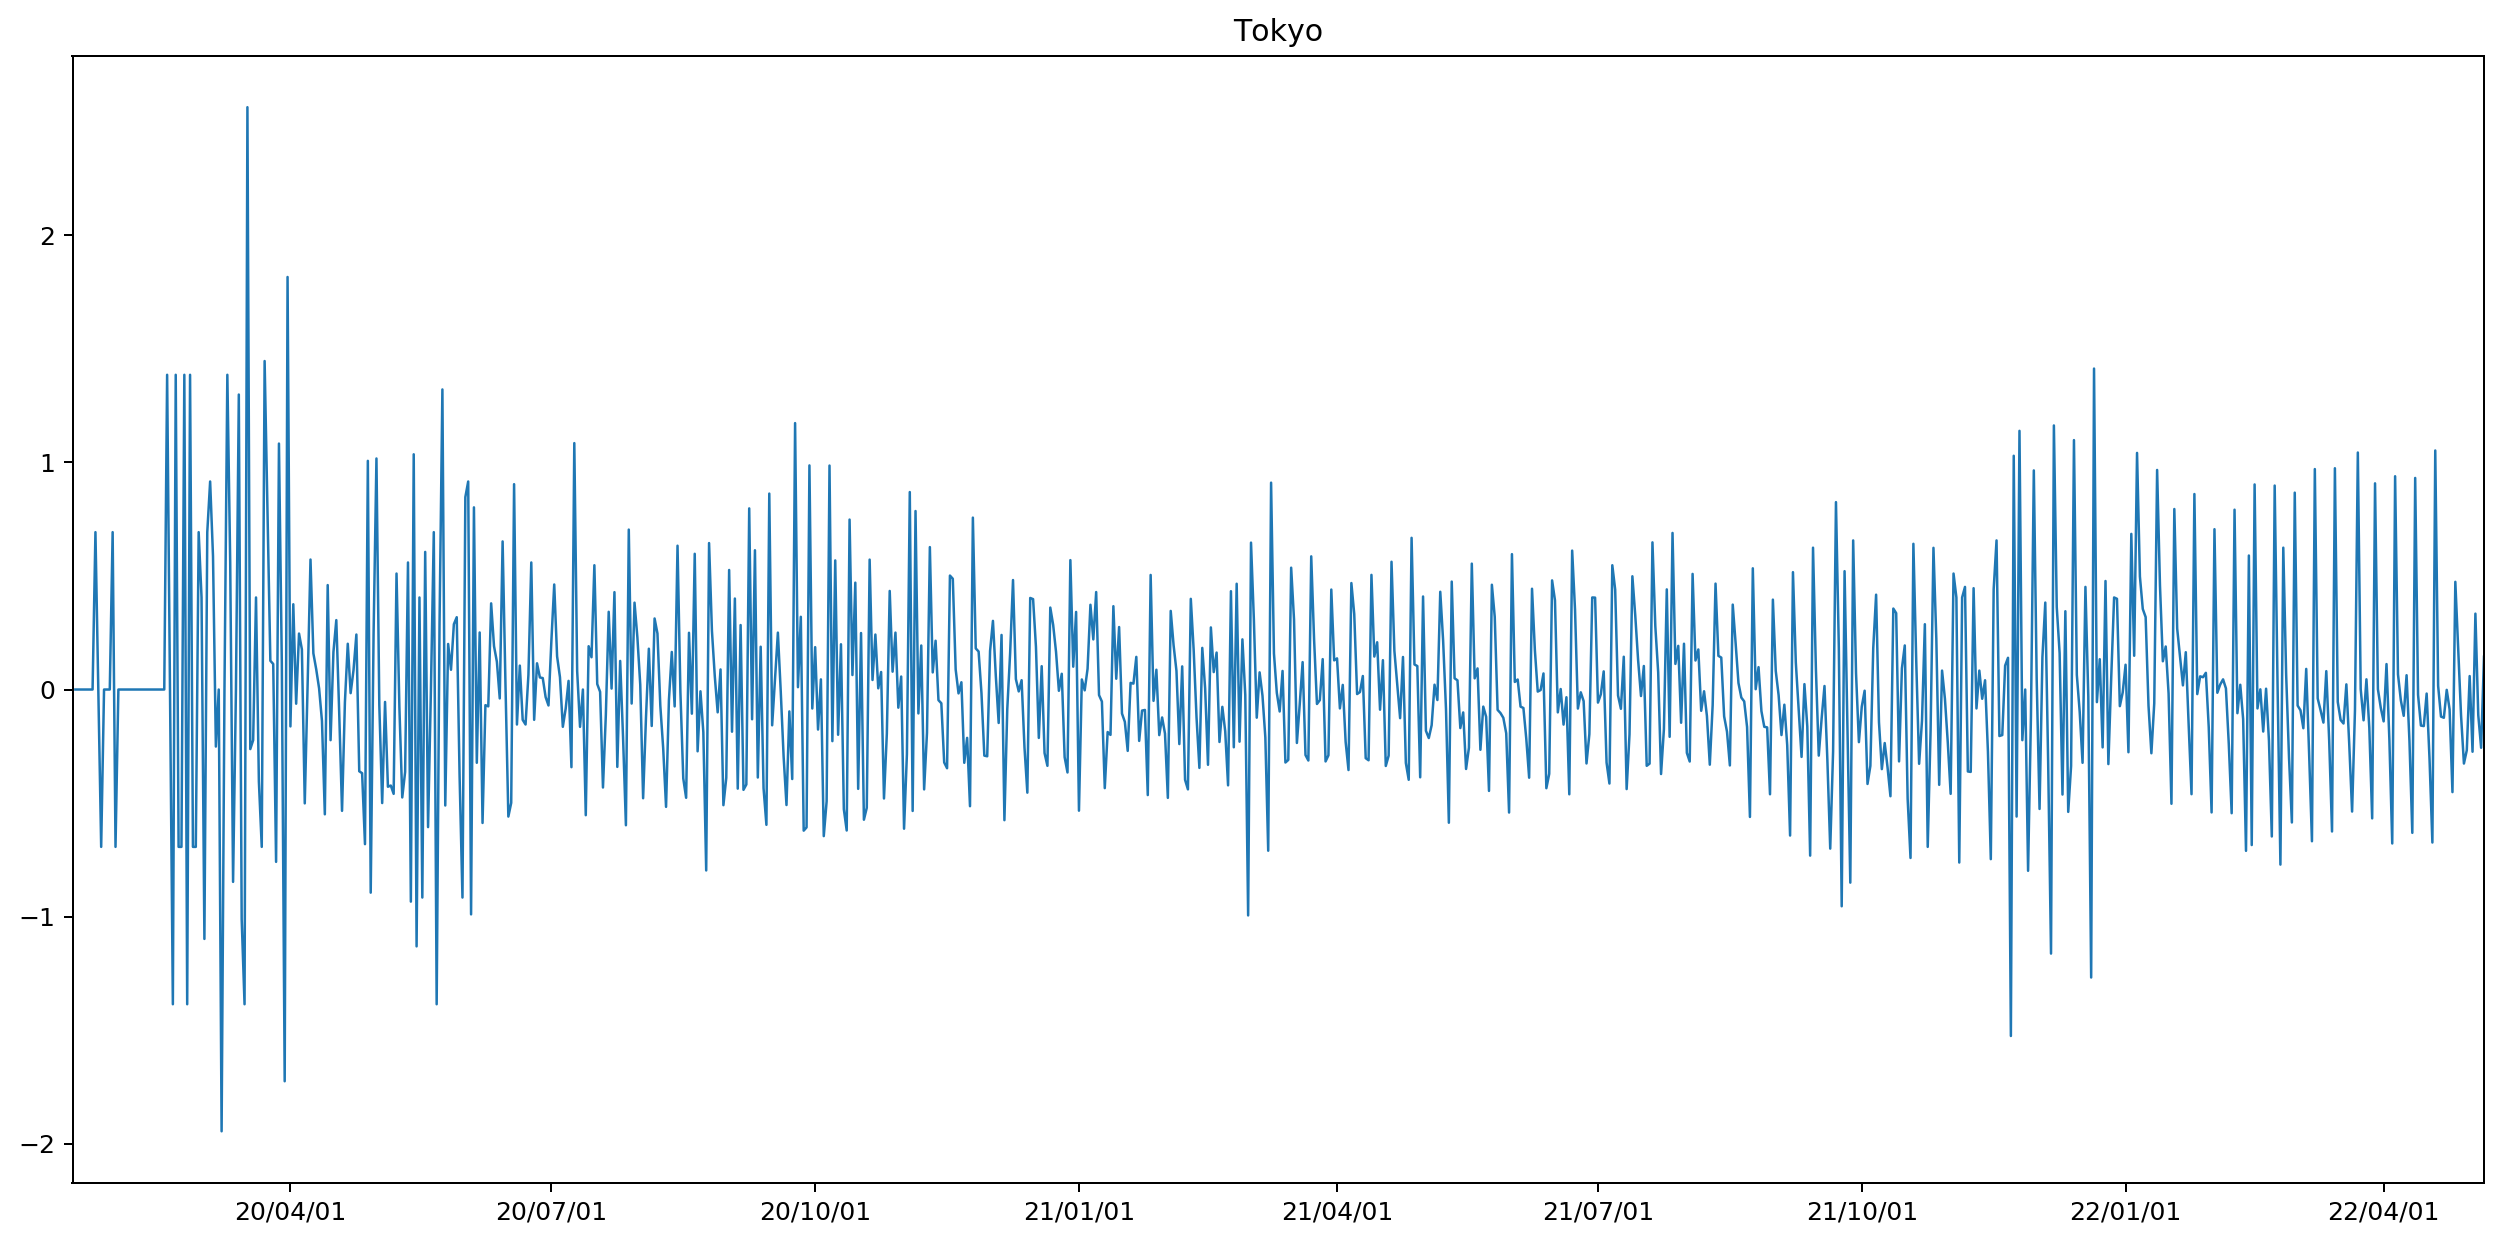

In [29]:
# 対数差分
fig = plt.figure(figsize=(14, 7), dpi=180)
x = df.index
y = np.log1p(df[target]).diff().to_numpy()
title = target
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth=1.0)
ax.xaxis.set_major_formatter(DateFormatter("%y/%m/%d"))
ax.set_xlim(x[0], x[-1])
ax.set_title(title, fontsize=12)
fig.tight_layout()
plt.show()
plt.close()

### 定常性と正規性

ADF statistic：-2.541408182467079
P-value：0.10572150725572965
Critival Value：{'1%': -3.4383498644698274, '5%': -2.865071125564052, '10%': -2.568650275133849}
歪度3.008
尖度9.331


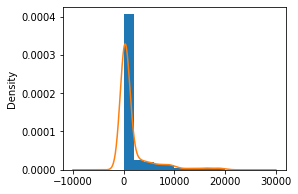

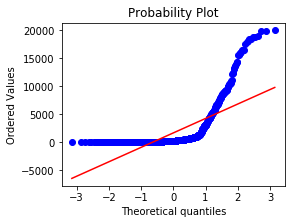

In [35]:
import statsmodels.tsa.api as tsa
import scipy.stats as st

target_values = df[target]

adf_rt = tsa.adfuller(target_values.to_numpy())
print(f"ADF statistic：{adf_rt[0]}")
print(f"P-value：{adf_rt[1]}")
print(f"Critival Value：{adf_rt[4]}")

skew = target_values.skew() # 歪度
kurt = target_values.kurt() # 尖度
print(f"歪度{round(skew, 3)}")
print(f"尖度{round(kurt, 3)}")

# カーネル密度推定
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
target_values.hist(density=True, ax=ax)
target_values.plot.kde(ax=ax)
plt.show()

# Q-Qプロット
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
st.probplot(target_values, plot=ax)
plt.show()

ADF statistic：-6.73680803571101
P-value：3.192182289035794e-09
Critival Value：{'1%': -3.4383596631852327, '5%': -2.865075444948184, '10%': -2.568652576059133}
歪度2.266
尖度29.444


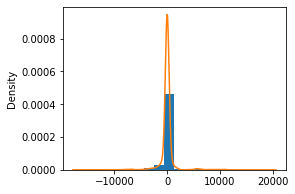

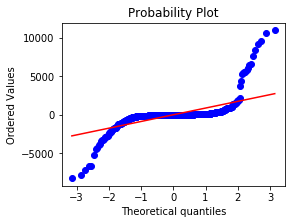

In [37]:
# 差分
target_values = df[target].diff()[1:]

adf_rt = tsa.adfuller(target_values.to_numpy())
print(f"ADF statistic：{adf_rt[0]}")
print(f"P-value：{adf_rt[1]}")
print(f"Critival Value：{adf_rt[4]}")

skew = target_values.skew() # 歪度
kurt = target_values.kurt() # 尖度
print(f"歪度{round(skew, 3)}")
print(f"尖度{round(kurt, 3)}")

# カーネル密度推定
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
target_values.hist(density=True, ax=ax)
target_values.plot.kde(ax=ax)
plt.show()

# Q-Qプロット
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
st.probplot(target_values, plot=ax)
plt.show()

ADF statistic：-3.386451174157201
P-value：0.011429513317267692
Critival Value：{'1%': -3.438340089700066, '5%': -2.8650668167215243, '10%': -2.568647979826153}
歪度-0.411
尖度-0.105


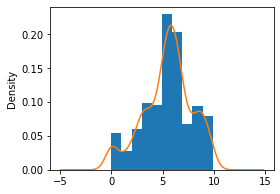

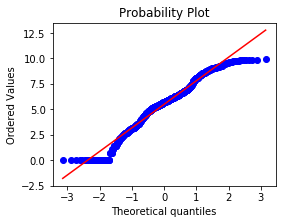

In [38]:
# 対数
target_values = np.log1p(df[target])

adf_rt = tsa.adfuller(target_values.to_numpy())
print(f"ADF statistic：{adf_rt[0]}")
print(f"P-value：{adf_rt[1]}")
print(f"Critival Value：{adf_rt[4]}")

skew = target_values.skew() # 歪度
kurt = target_values.kurt() # 尖度
print(f"歪度{round(skew, 3)}")
print(f"尖度{round(kurt, 3)}")

# カーネル密度推定
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
target_values.hist(density=True, ax=ax)
target_values.plot.kde(ax=ax)
plt.show()

# Q-Qプロット
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
st.probplot(target_values, plot=ax)
plt.show()

ADF statistic：-4.054585155756462
P-value：0.0011501690118864971
Critival Value：{'1%': -3.4383596631852327, '5%': -2.865075444948184, '10%': -2.568652576059133}
歪度0.38
尖度2.487


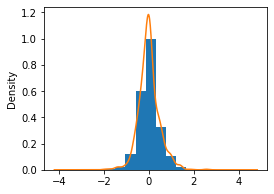

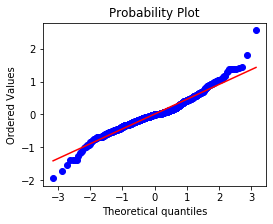

In [39]:
# 対数差分
target_values = np.log1p(df[target]).diff()[1:]

adf_rt = tsa.adfuller(target_values.to_numpy())
print(f"ADF statistic：{adf_rt[0]}")
print(f"P-value：{adf_rt[1]}")
print(f"Critival Value：{adf_rt[4]}")

skew = target_values.skew() # 歪度
kurt = target_values.kurt() # 尖度
print(f"歪度{round(skew, 3)}")
print(f"尖度{round(kurt, 3)}")

# カーネル密度推定
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
target_values.hist(density=True, ax=ax)
target_values.plot.kde(ax=ax)
plt.show()

# Q-Qプロット
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
st.probplot(target_values, plot=ax)
plt.show()

### 自己相関

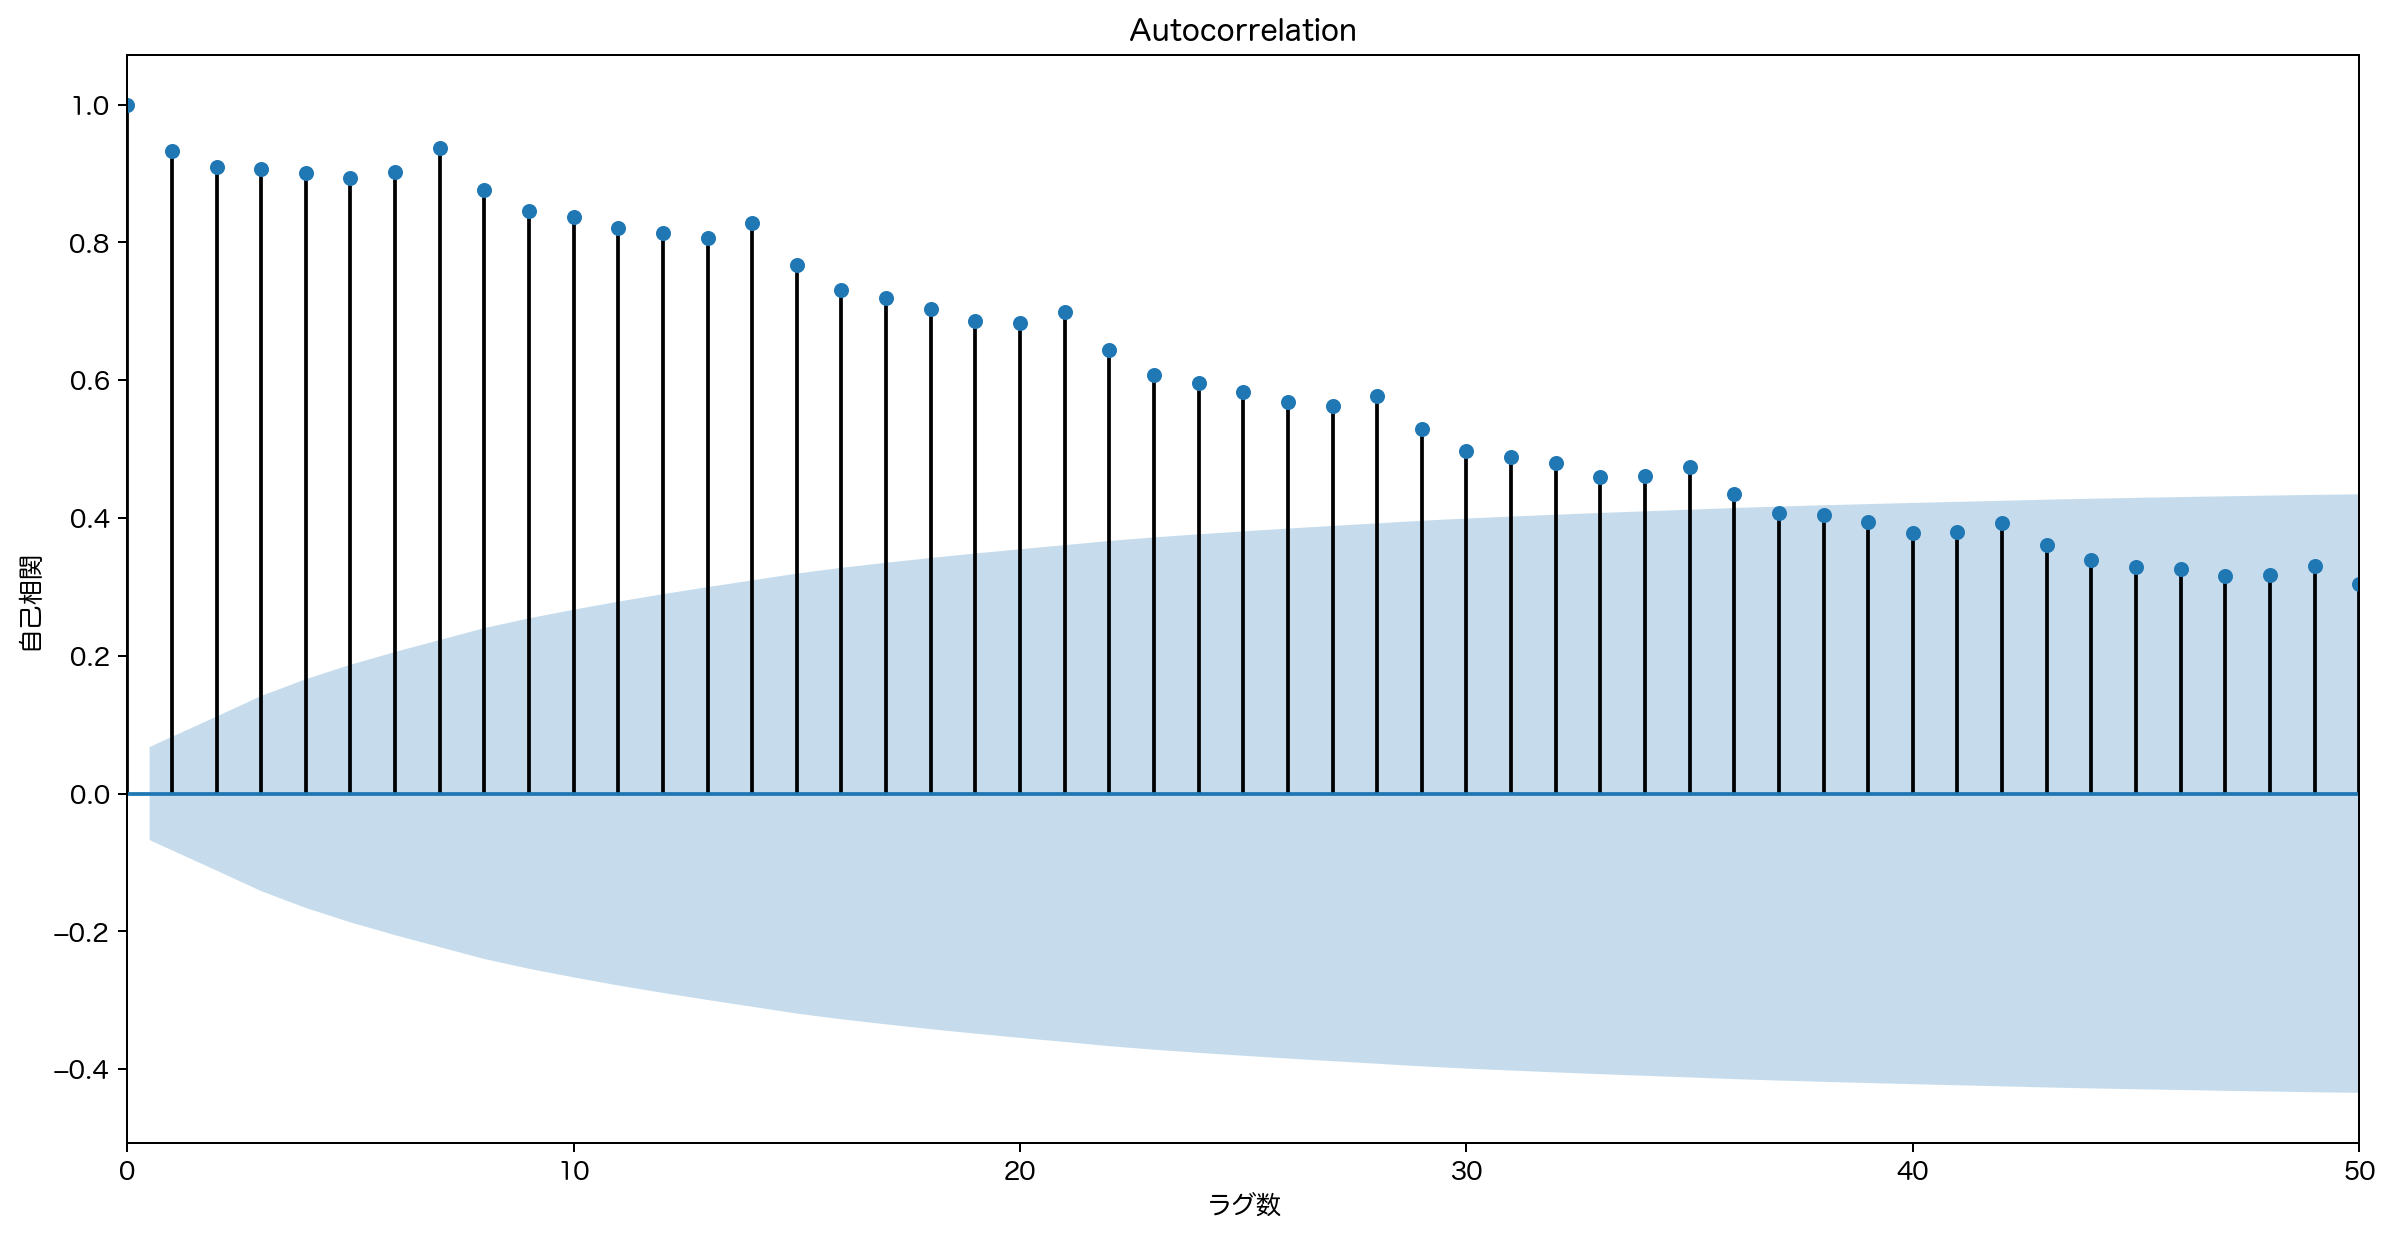

In [52]:
import statsmodels.api as sm

# 原系列
fig = plt.figure(figsize=(16, 8), dpi=180)
ax = fig.add_subplot(111)
sm.graphics.tsa.plot_acf(df[target].to_numpy(), lags=50, ax=ax)
ax.set_xlabel("ラグ数")
ax.set_ylabel("自己相関")
ax.set_xlim(0, 50)
plt.show()
plt.close()

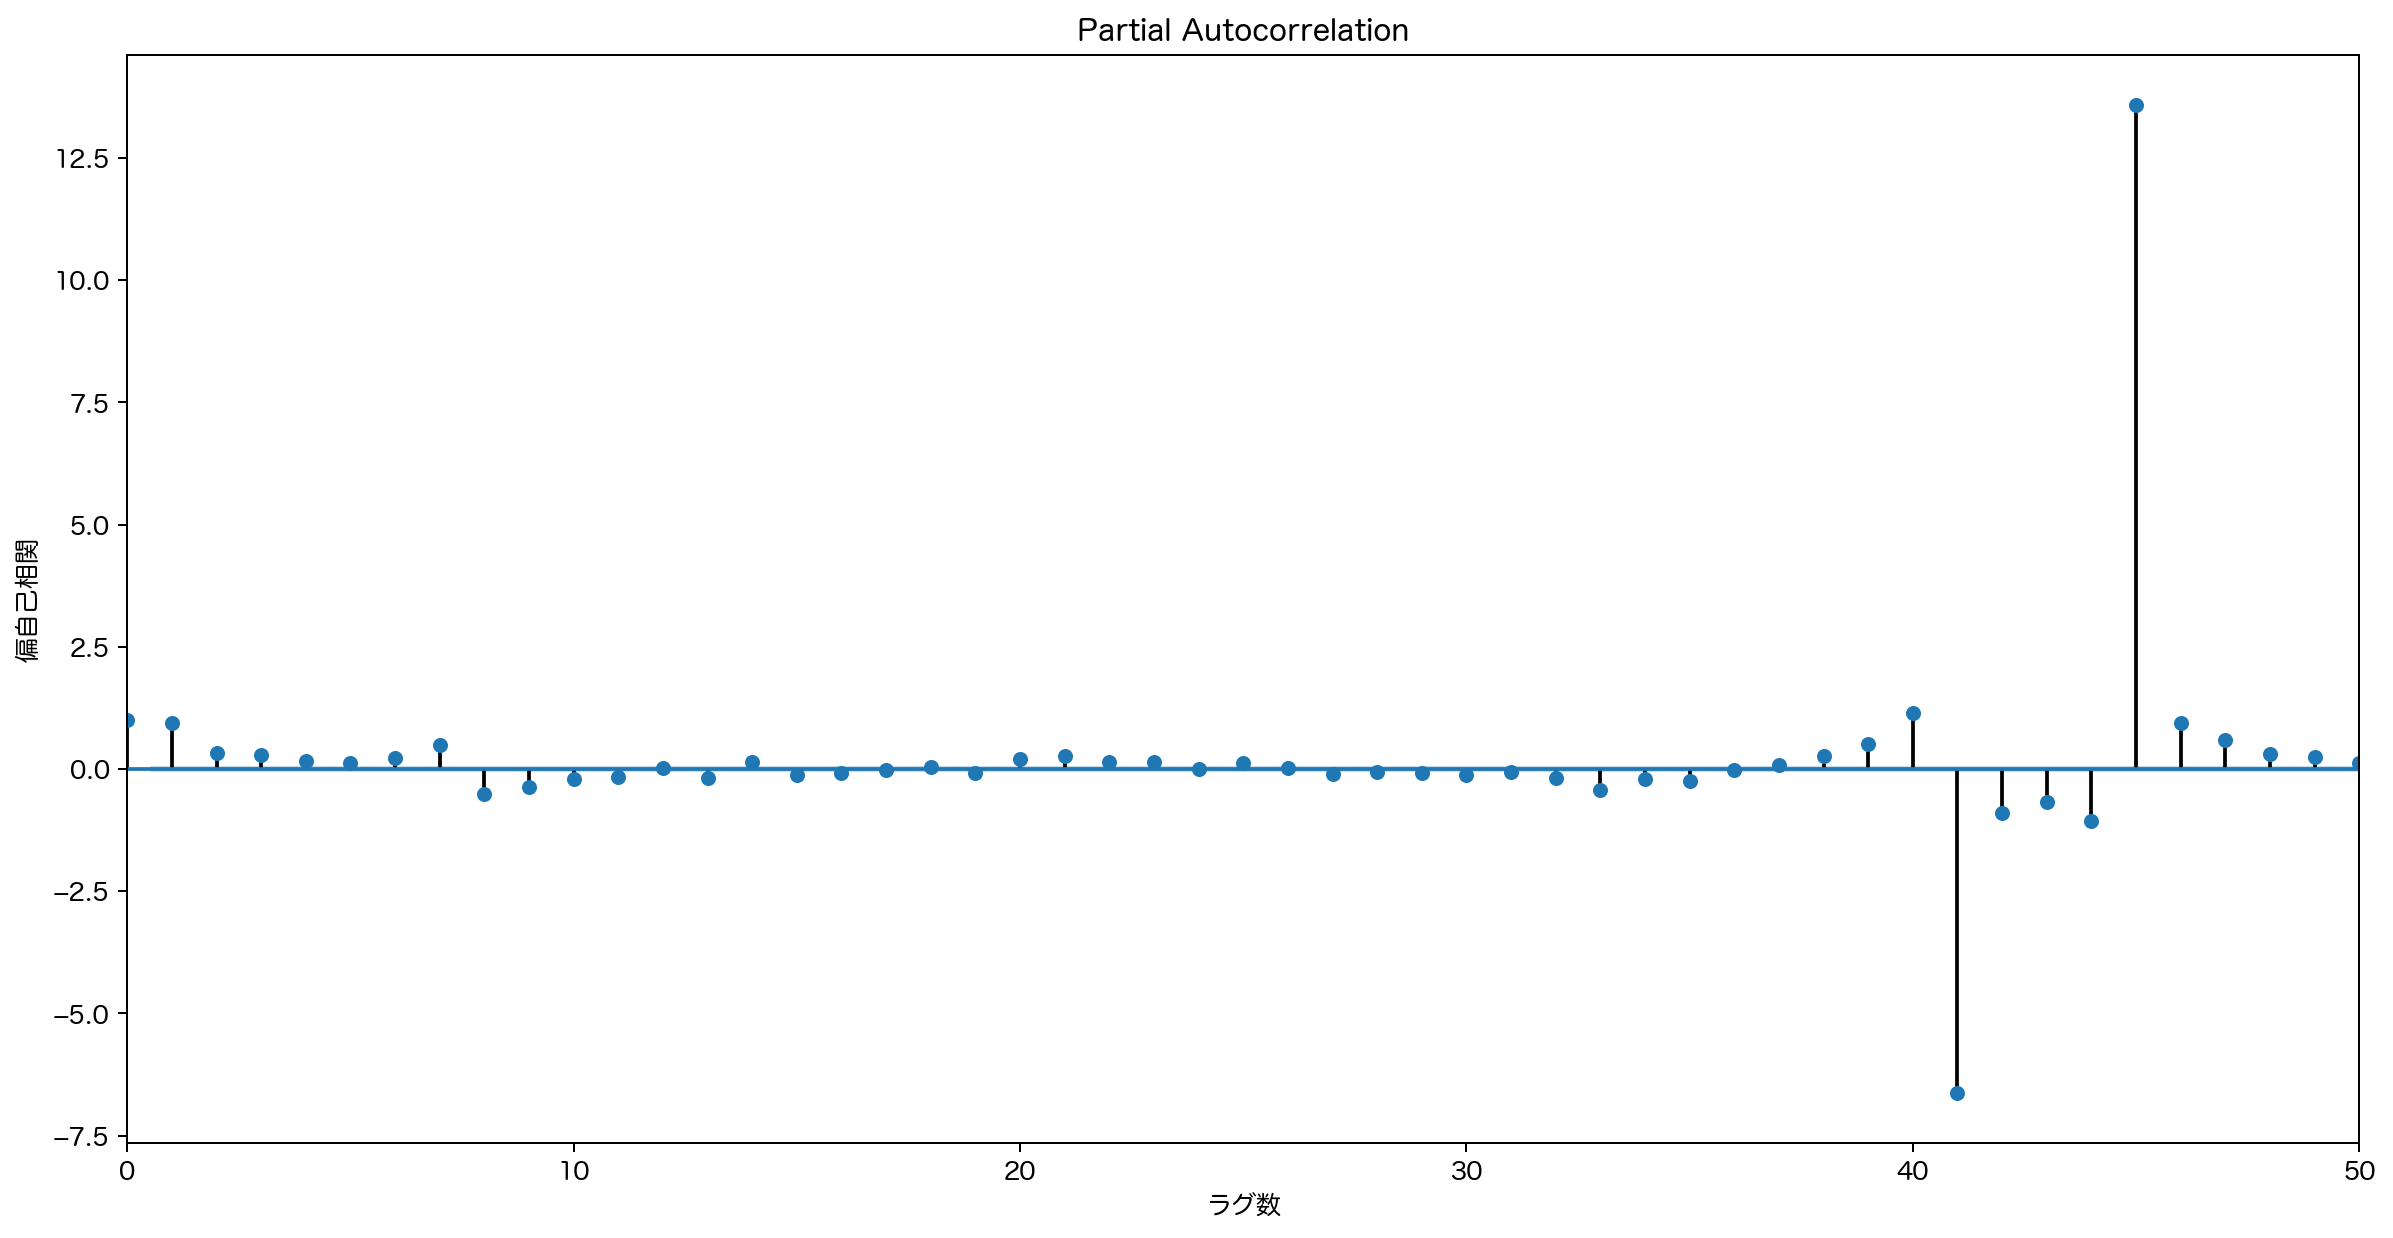

In [53]:
# 原系列
fig = plt.figure(figsize=(16, 8), dpi=180)
ax = fig.add_subplot(111)
sm.graphics.tsa.plot_pacf(df[target].to_numpy(), lags=50, ax=ax)
ax.set_xlabel("ラグ数")
ax.set_ylabel("偏自己相関")
ax.set_xlim(0, 50)
plt.show()
plt.close()

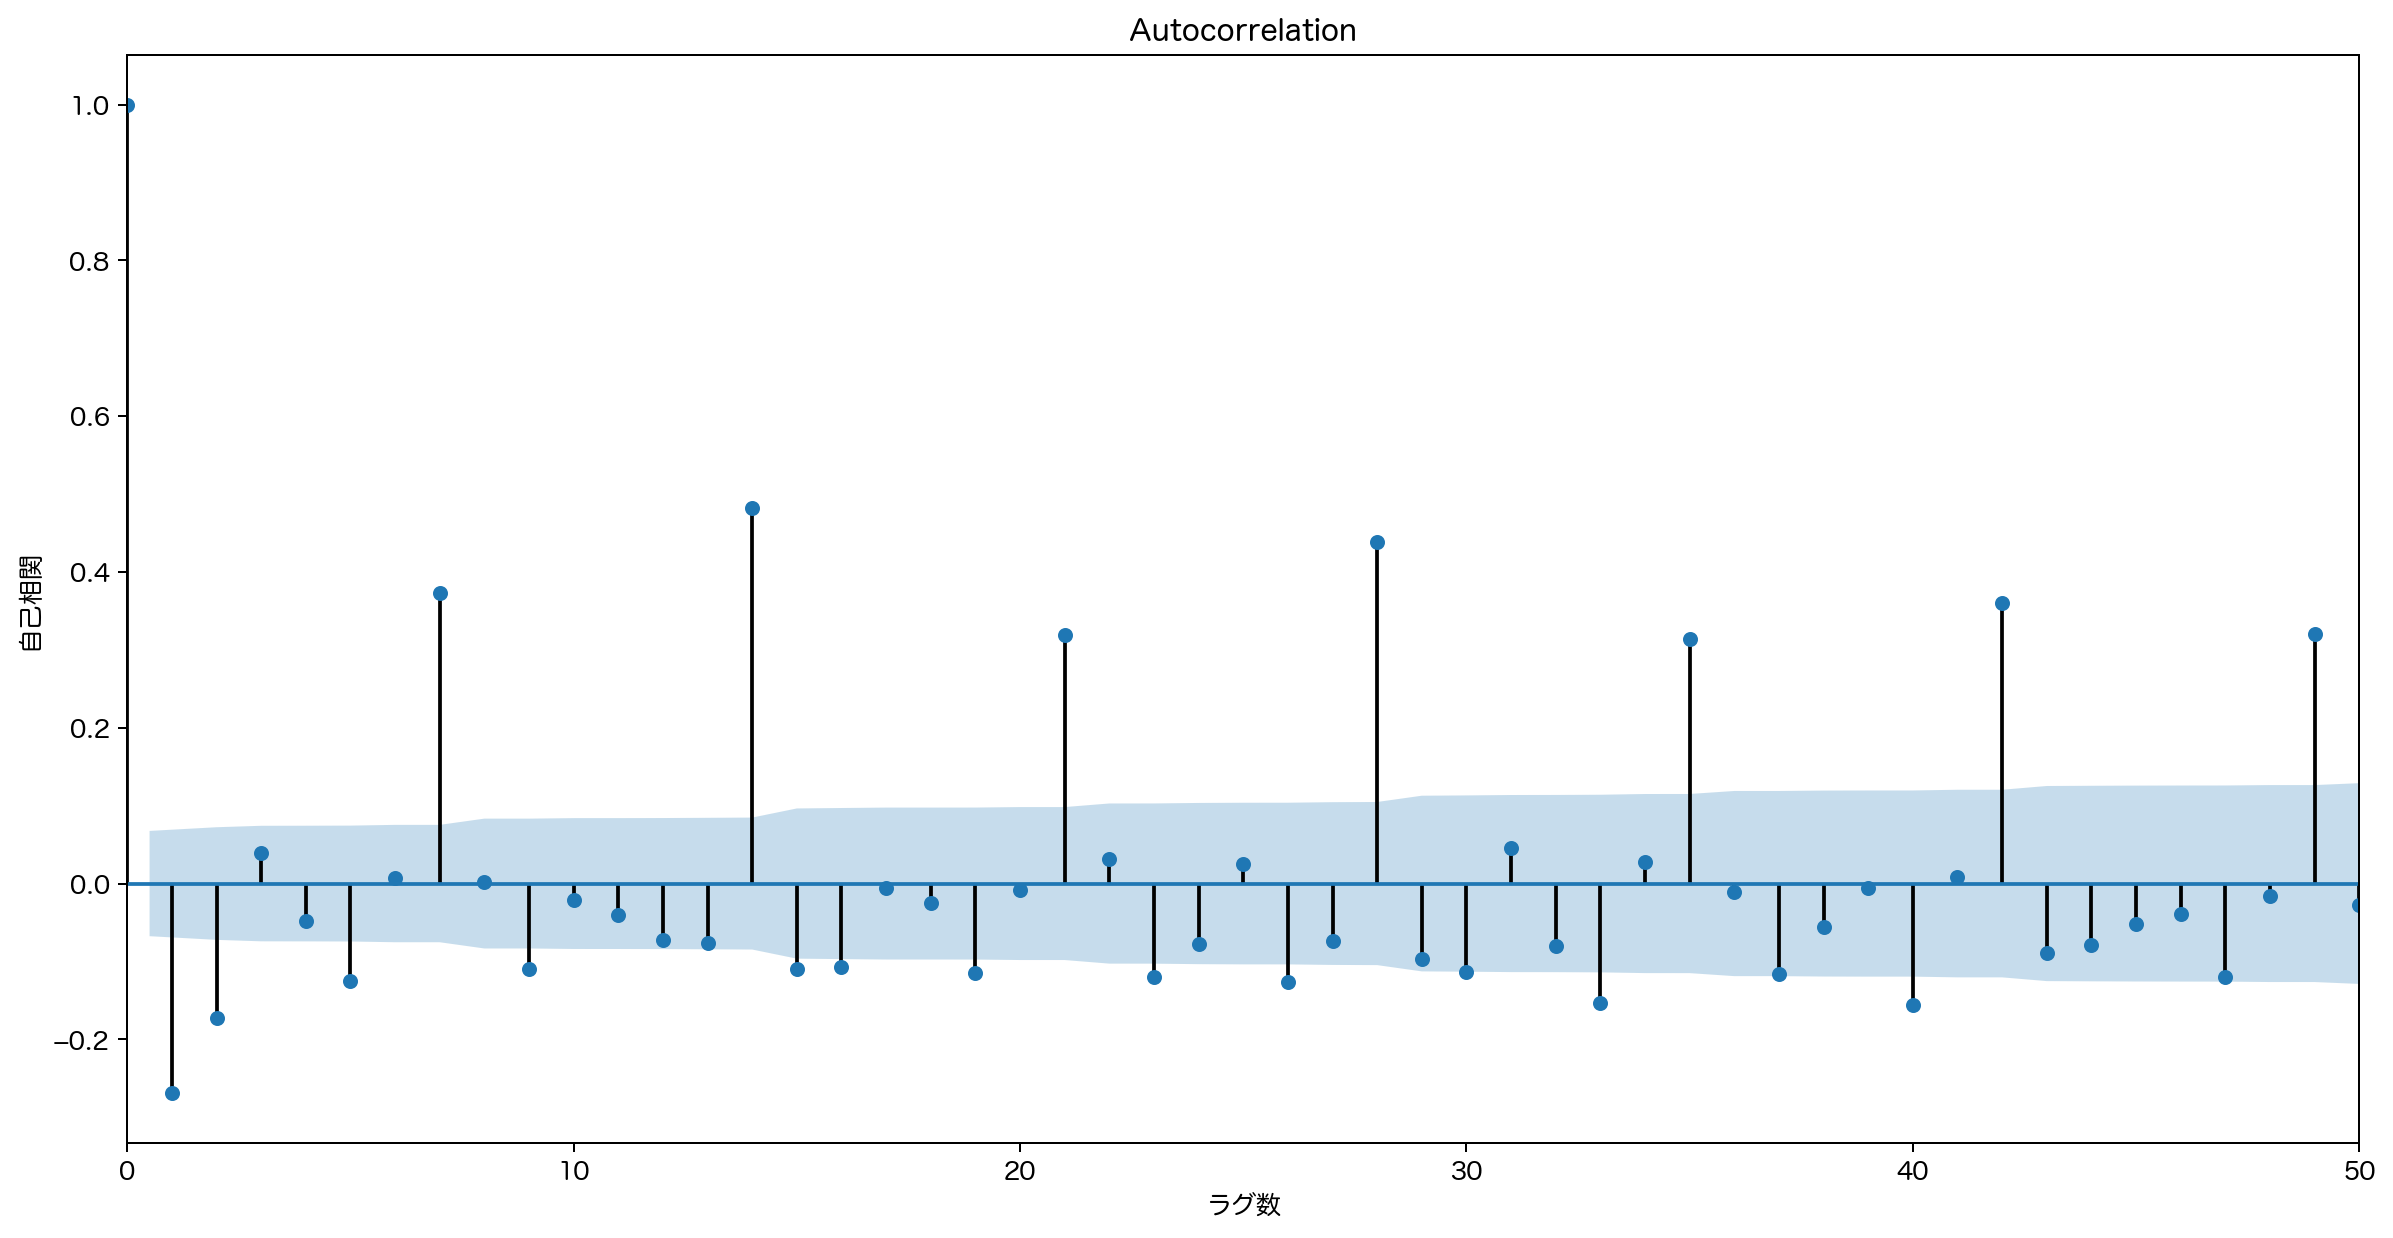

In [54]:
# 対数差分
np.log1p(df[target]).diff()[1:]
fig = plt.figure(figsize=(16, 8), dpi=180)
ax = fig.add_subplot(111)
sm.graphics.tsa.plot_acf(np.log1p(df[target]).diff().to_numpy()[1:], lags=50, ax=ax)
ax.set_xlabel("ラグ数")
ax.set_ylabel("自己相関")
ax.set_xlim(0, 50)
plt.show()
plt.close()

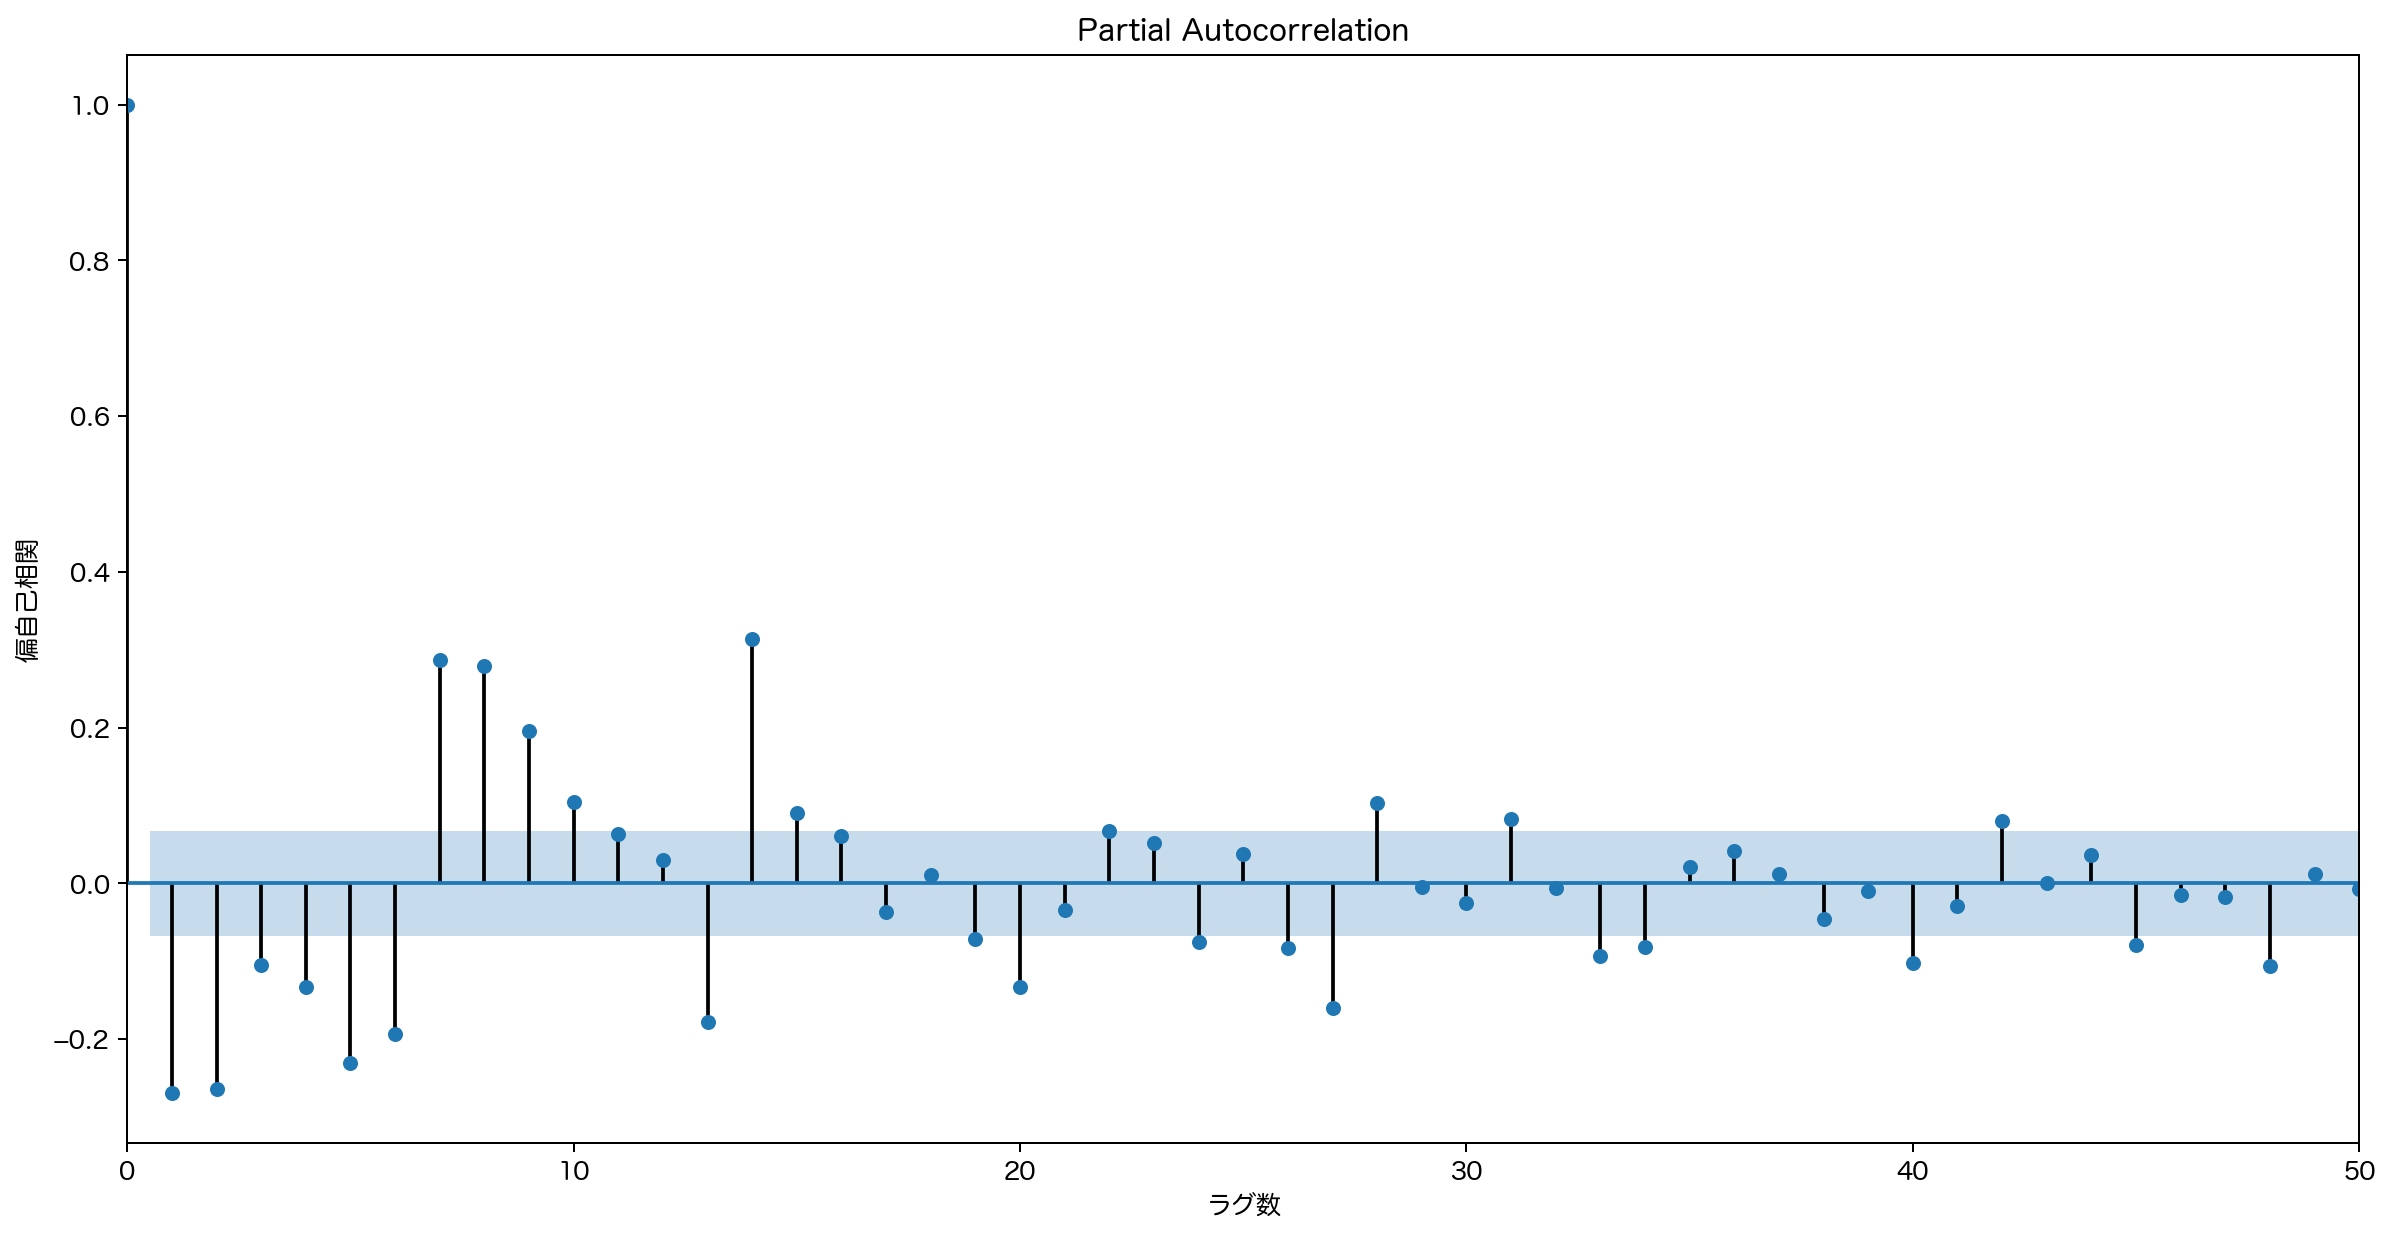

In [55]:
# 対数差分
np.log1p(df[target]).diff()[1:]
fig = plt.figure(figsize=(16, 8), dpi=180)
ax = fig.add_subplot(111)
sm.graphics.tsa.plot_pacf(np.log1p(df[target]).diff().to_numpy()[1:], lags=50, ax=ax)
ax.set_xlabel("ラグ数")
ax.set_ylabel("偏自己相関")
ax.set_xlim(0, 50)
plt.show()
plt.close()

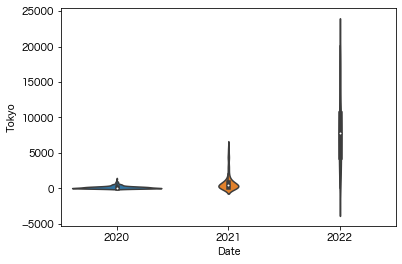

In [64]:
import seaborn as sns

# 原系列
x = df.index.year
sns.violinplot(data=df, y=target, x=x)

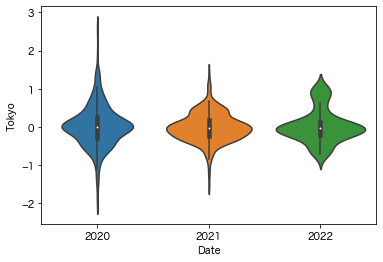

In [68]:
# 対数差分
sns.violinplot(data=np.log1p(df).diff(), y=target, x=x)